In [2]:
import pandas as pd

In [3]:
df_r = pd.read_csv(r"C:\Users\Yuri\Downloads\bikereturn.csv")
df_b= pd.read_csv(r"C:\Users\Yuri\Downloads\bikeborrow.xlsx - 대여소대여내역 (6).csv")

In [4]:
print(df_r.shape)
print(df_b.shape)


(245446, 6)
(245446, 6)


In [5]:
print(df_b.isna().sum())
print(df_b.dtypes)

print(df_r.isna().sum())
print(df_r.dtypes)

District_KR             0
Bike_Station_Name_KR    0
Date                    0
Bike_Qty                0
District                0
Bike_Station_Name       0
dtype: int64
District_KR             object
Bike_Station_Name_KR    object
Date                    object
Bike_Qty                 int64
District                object
Bike_Station_Name       object
dtype: object
District_KR             0
Bike_Station_Name_KR    0
Date                    0
Bike_Qty                0
District                0
Bike_Station_Name       0
dtype: int64
District_KR             object
Bike_Station_Name_KR    object
Date                    object
Bike_Qty                 int64
District                object
Bike_Station_Name       object
dtype: object


In [9]:
duplicates = df_r[df_r.duplicated()]
print(duplicates)


       District_KR Bike_Station_Name_KR        Date  Bike_Qty       District  \
28285       그룹명 없음              대여소명 없음    3/8/2017         1  No group name   
38492       그룹명 없음              대여소명 없음   3/31/2017         1  No group name   
43823       그룹명 없음              대여소명 없음   4/12/2017         1  No group name   
43824       그룹명 없음              대여소명 없음   4/12/2017         1  No group name   
45607       그룹명 없음              대여소명 없음   4/16/2017         1  No group name   
...            ...                  ...         ...       ...            ...   
214689      그룹명 없음              대여소명 없음  11/30/2017         1  No group name   
226313      그룹명 없음              대여소명 없음  12/12/2017         1  No group name   
228238      그룹명 없음              대여소명 없음  12/14/2017         1  No group name   
228239      그룹명 없음              대여소명 없음  12/14/2017         1  No group name   
229227      그룹명 없음              대여소명 없음  12/15/2017         1  No group name   

        Bike_Station_Name  
28285   No 

In [10]:
df = pd.merge(df_b, df_r, on=['Date', 'Bike_Station_Name_KR'])


In [12]:
df.head()

District_KR_x Bike_Station_Name_KR      Date  Bike_Qty_x    District_x  \
0          None                 None  1/1/2017           0          None   
1           광진구  500. 어린이대공원역 3번출구 앞  1/1/2017          20  Gwangjin -gu   
2           광진구         501. 광진구의회 앞  1/1/2017          10  Gwangjin -gu   
3           광진구   502. 뚝섬유원지역 1번출구 앞  1/1/2017           9  Gwangjin -gu   
4           광진구     503. 더샵스타시티 C동 앞  1/1/2017           9  Gwangjin -gu   

                                 Bike_Station_Name_x District_KR_y  \
0                                               None          None   
1  500. In front of Exit 3 of Children's Grand Pa...           광진구   
2              501. In front of Gwangjin -gu council           광진구   
3                            502. In front of Exit 1           광진구   
4        503. In front of the Sharp Star City C dong           광진구   

   Bike_Qty_y    District_y                                Bike_Station_Name_y  
0          10          None                                               None  
1          12  Gwangjin -gu  500. In front of Exit 3 of Children's Grand Pa...  
2          10  Gwangjin -gu              501. In front of Gwangjin -gu council  
3          13  Gwangjin -gu                            502. In front of Exit 1  
4           8  Gwangjin -gu        503. In front of the Sharp Star City C dong

In [13]:
duplicates = df[df.duplicated()]
print(duplicates)


       District_KR_x Bike_Station_Name_KR        Date  Bike_Qty_x  \
5713          그룹명 없음              대여소명 없음   1/14/2017           0   
5714          그룹명 없음              대여소명 없음   1/14/2017           0   
10692         그룹명 없음              대여소명 없음   1/26/2017           0   
10693         그룹명 없음              대여소명 없음   1/26/2017           0   
12640         그룹명 없음              대여소명 없음   1/31/2017           0   
...              ...                  ...         ...         ...   
243058        그룹명 없음              대여소명 없음  12/28/2017           0   
243059        그룹명 없음              대여소명 없음  12/28/2017           0   
243060        그룹명 없음              대여소명 없음  12/28/2017           0   
245049        그룹명 없음              대여소명 없음  12/30/2017           0   
245050        그룹명 없음              대여소명 없음  12/30/2017           0   

           District_x Bike_Station_Name_x District_KR_y  Bike_Qty_y  \
5713    No group name   No rental calling        그룹명 없음          10   
5714    No group name   No re

In [14]:
df = df[~df['Bike_Station_Name_KR'].isin(['None', '대여소명 없음'])]


In [15]:
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [District_KR_x, Bike_Station_Name_KR, Date, Bike_Qty_x, District_x, Bike_Station_Name_x, District_KR_y, Bike_Qty_y, District_y, Bike_Station_Name_y]
Index: []


In [16]:
df.shape

(244630, 10)

In [17]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

District_KR_x                   object
Bike_Station_Name_KR            object
Date                    datetime64[ns]
Bike_Qty_x                       int64
District_x                      object
Bike_Station_Name_x             object
District_KR_y                   object
Bike_Qty_y                       int64
District_y                      object
Bike_Station_Name_y             object
dtype: object

In [18]:
df.rename(columns=lambda x: x.replace('Bike_Qty_x', 'Bikes_Borrowed').replace('Bike_Qty_y', 'Bikes_Returned').replace('District_KR_x', 'District_KR').replace('District_x', 'District').replace('Bike_Station_Name_x', 'Bike_Station_Name'), inplace=True)


In [19]:
df.drop(['District_KR_y', 'District_y','Bike_Station_Name_y'], axis=1, inplace=True)

In [20]:
na_rows = df[df.isna().any(axis=1)]
na_rows

Empty DataFrame
Columns: [District_KR, Bike_Station_Name_KR, Date, Bikes_Borrowed, District, Bike_Station_Name, Bikes_Returned]
Index: []

In [21]:
max_date = df["Date"].max()
min_date = df["Date"].min()
print(f'Earliest data log at: {min_date}')
print(f'Latest data log at: {max_date}')
print(f'Dataframe total time duration: {max_date - min_date}')

Earliest data log at: 2017-01-01 00:00:00
Latest data log at: 2017-12-31 00:00:00
Dataframe total time duration: 364 days 00:00:00


In [22]:
### Adding the following features as columns in the dataframe:


df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Day_name"] = df["Date"].dt.day_name()
df.head()

District_KR Bike_Station_Name_KR       Date  Bikes_Borrowed      District  \
1         광진구  500. 어린이대공원역 3번출구 앞 2017-01-01              20  Gwangjin -gu   
2         광진구         501. 광진구의회 앞 2017-01-01              10  Gwangjin -gu   
3         광진구   502. 뚝섬유원지역 1번출구 앞 2017-01-01               9  Gwangjin -gu   
4         광진구     503. 더샵스타시티 C동 앞 2017-01-01               9  Gwangjin -gu   
5         광진구       504. 신자초교입구교차로 2017-01-01               6  Gwangjin -gu   

                                   Bike_Station_Name  Bikes_Returned  Day  \
1  500. In front of Exit 3 of Children's Grand Pa...              12    1   
2              501. In front of Gwangjin -gu council              10    1   
3                            502. In front of Exit 1              13    1   
4        503. In front of the Sharp Star City C dong               8    1   
5  504. Intersection of believer elementary schoo...              13    1   

   Month Day_name  
1      1   Sunday  
2      1   Sunday  
3      1   Sunday  
4      1   Sunday  
5      1   Sunday

In [23]:
import re
df['Station ID'] = df['Bike_Station_Name'].str.split('.').str[0]
df['Bike_Station_Name_KR'] = df['Bike_Station_Name_KR'].apply(lambda x: re.sub(r'^\d+\.\s', '', x))

df['Bike_Station_Name'] = df['Bike_Station_Name'].apply(lambda x: re.sub(r'^\d+\.\s', '', x))


For easier readability, the columns are going to be reordered in a more logical order.

In [24]:

df = df.reindex(columns=['Date','District', 'Station ID','Bike_Station_Name', 'Bikes_Borrowed','Bikes_Returned','Month','Day','Day_name','District_KR','Bike_Station_Name_KR'])
df



Date      District Station ID  \
1      2017-01-01  Gwangjin -gu        500   
2      2017-01-01  Gwangjin -gu        501   
3      2017-01-01  Gwangjin -gu        502   
4      2017-01-01  Gwangjin -gu        503   
5      2017-01-01  Gwangjin -gu        504   
...           ...           ...        ...   
246933 2017-12-31  Jungnang -gu       1442   
246934 2017-12-31  Jungnang -gu       1445   
246935 2017-12-31  Jungnang -gu       1446   
246936 2017-12-31  Jungnang -gu       1447   
246937 2017-12-31  Jungnang -gu       1448   

                                        Bike_Station_Name  Bikes_Borrowed  \
1       In front of Exit 3 of Children's Grand Park St...              20   
2                        In front of Gwangjin -gu council              10   
3                                      In front of Exit 1               9   
4                  In front of the Sharp Star City C dong               9   
5       Intersection of believer elementary school ent...               6   
...                                                   ...             ...   
246933       (former) Shinhan Bank Jungnang Bridge Branch               3   
246934                                    Yongma District               1   
246935                    Jungnang Telephone Intersection               3   
246936                            Myeonmok Station Exit 3               1   
246937                                    Costco reunions              10   

        Bikes_Returned  Month  Day Day_name District_KR Bike_Station_Name_KR  
1                   12      1    1   Sunday         광진구       어린이대공원역 3번출구 앞  
2                   10      1    1   Sunday         광진구              광진구의회 앞  
3                   13      1    1   Sunday         광진구        뚝섬유원지역 1번출구 앞  
4                    8      1    1   Sunday         광진구          더샵스타시티 C동 앞  
5                   13      1    1   Sunday         광진구            신자초교입구교차로  
...                ...    ...  ...      ...         ...                  ...  
246933               1     12   31   Sunday         중랑구        (구)신한은행 중랑교지점  
246934               0     12   31   Sunday         중랑구                용마지구대  
246935               2     12   31   Sunday         중랑구            중랑전화국 교차로  
246936               2     12   31   Sunday         중랑구             면목역 3번출구  
246937               8     12   31   Sunday         중랑구             코스트코 상봉점  

[244630 rows x 11 columns]

In [25]:
df.corr() 
###high correlation per station bikes_returne&bikes borrowed

Bikes_Borrowed  Bikes_Returned     Month       Day
Bikes_Borrowed        1.000000        0.961597  0.054887  0.019503
Bikes_Returned        0.961597        1.000000  0.051982  0.018683
Month                 0.054887        0.051982  1.000000  0.009338
Day                   0.019503        0.018683  0.009338  1.000000

In [26]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [27]:
# Basic Overview of Data
fig = px.treemap(df,path= ["District","Bike_Station_Name"],
            values="Bikes_Borrowed", color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(margin = dict(t=100, l=50, r=50, b=50))

In [28]:
### Do districts with high borrow counts have a high number of bike stations?
district_station_counts = df.groupby('District')['Bike_Station_Name_KR'].nunique().sort_values(ascending=False)

total_stations = len(df['Bike_Station_Name_KR'].unique())
district_station_counts_percentage = district_station_counts / total_stations * 100

print(district_station_counts_percentage)


###Results show that number of stations in a district does completely not strongly correlate with bike borrowing numbers per district

District
Yeongdeungpo -gu    6.635071
Gangnam-gu          6.540284
Mapo -gu            6.540284
Songpa -gu          5.497630
Seocho -gu          5.497630
Seongdong -gu       5.118483
Jongno -gu          5.023697
Seodaemun -gu       4.360190
Guro -gu            4.170616
Gangdong -gu        4.075829
Gwangjin -gu        4.075829
Seongbuk -gu        3.981043
Jungnang -gu        3.791469
Gangseo -gu         3.696682
Dongdaemun -gu      3.507109
Eunpyeong -gu       3.507109
Nowon -gu           3.412322
Gwanak -gu          3.317536
Jung-gu             3.222749
Geumcheon -gu       3.033175
Gangbuk -gu         2.654028
Dongjakgu           2.654028
Yongsan -gu         2.274882
Yangcheon -gu       1.895735
Dobong -gu          1.516588
Name: Bike_Station_Name_KR, dtype: float64


In [89]:
district_bikes_borrowed = df.groupby('District')['Bikes_Borrowed'].sum()
# Calculate the correlation between the two variables
correlation = district_station_counts.corr(district_bikes_borrowed)
print(correlation)

0.6657909381812886


In [92]:
district_bikes_borrowed = df.groupby('District')['Bikes_Borrowed'].sum().sort_values(ascending=False)
district_bikes_borrowed

District
Mapo -gu            781594
Yeongdeungpo -gu    653789
Jongno -gu          487342
Seongdong -gu       377067
Seodaemun -gu       310396
Gwangjin -gu        306407
Dongdaemun -gu      241653
Jung-gu             240668
Eunpyeong -gu       184674
Songpa -gu          160528
Seocho -gu          141841
Yongsan -gu         140318
Gangnam-gu          127593
Gangseo -gu         115786
Gwanak -gu          108005
Dongjakgu            95234
Nowon -gu            88320
Guro -gu             82621
Gangdong -gu         78419
Seongbuk -gu         74609
Yangcheon -gu        74242
Jungnang -gu         72474
Geumcheon -gu        35803
Gangbuk -gu          31028
Dobong -gu           19855
Name: Bikes_Borrowed, dtype: int64

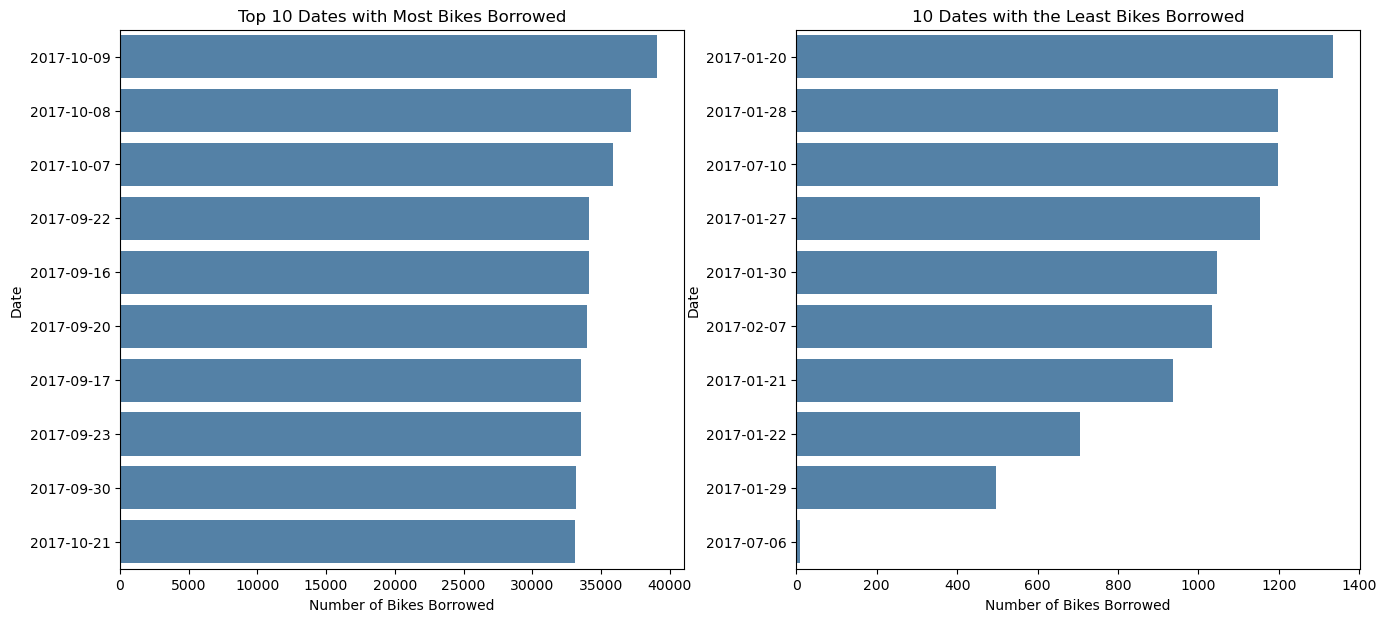

In [31]:
daily= df.groupby(by = ["Date"])["Bikes_Borrowed"].sum()
daily.sort_values(ascending=False, inplace=True)
top_ten = daily[:10]
bottom_ten = daily[len(daily)-10:]

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,7])

ax1 = sns.barplot(x=top_ten.values, y=top_ten.index.date, orient="h", color="steelblue", ax=ax1)
ax1.set_title("Top 10 Dates with Most Bikes Borrowed")
ax1.set_xlabel("Number of Bikes Borrowed")
ax1.set_ylabel("Date")

ax2 = sns.barplot(x=bottom_ten.values, y=bottom_ten.index.date, orient="h", color="steelblue", ax=ax2)
ax2.set_title("10 Dates with the Least Bikes Borrowed")
ax2.set_xlabel("Number of Bikes Borrowed")
ax2.set_ylabel("Date")

plt.show()

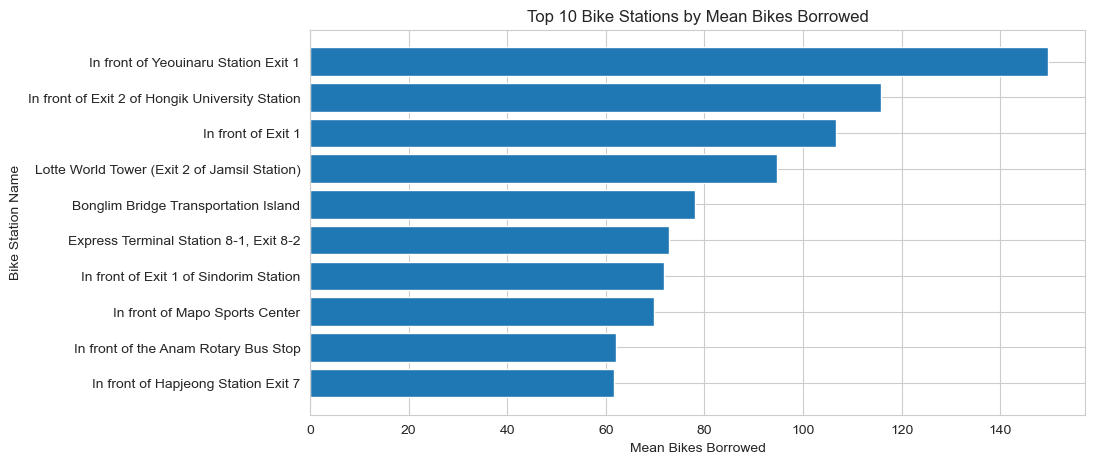

In [158]:
#the top 10 stations with the highest average bike quantity borrowed
mean_bikes_borrowed = df.groupby('Bike_Station_Name')['Bikes_Borrowed'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(mean_bikes_borrowed.head(10).index, mean_bikes_borrowed.head(10).values)

ax.invert_yaxis()
ax.set_xlabel('Mean Bikes Borrowed')
ax.set_ylabel('Bike Station Name')
ax.set_title('Top 10 Bike Stations by Mean Bikes Borrowed')

plt.show()


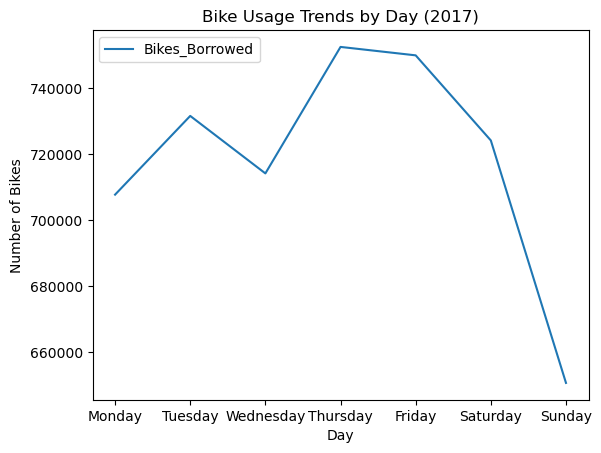

In [63]:
## trends in bike usage by day of the week
##ordering the dates
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day_name'] = pd.Categorical(df['Day_name'], categories=day_order, ordered=True)
monthly_data = df.groupby('Day_name').sum()[['Bikes_Borrowed']]

# Line
monthly_data.plot(kind='line')
plt.title('Bike Usage Trends by Day (2017)')
plt.xlabel('Day')
plt.ylabel('Number of Bikes')
plt.show()

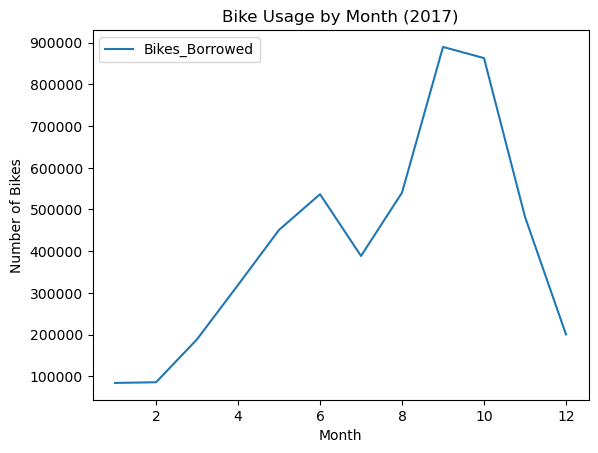

In [97]:
#Relationship between bike usage and month
month = df.groupby('Month').sum()[['Bikes_Borrowed']]

month.plot(kind='line')
plt.title('Bike Usage by Month (2017)')
plt.xlabel('Month')
plt.ylabel('Number of Bikes')
plt.show()

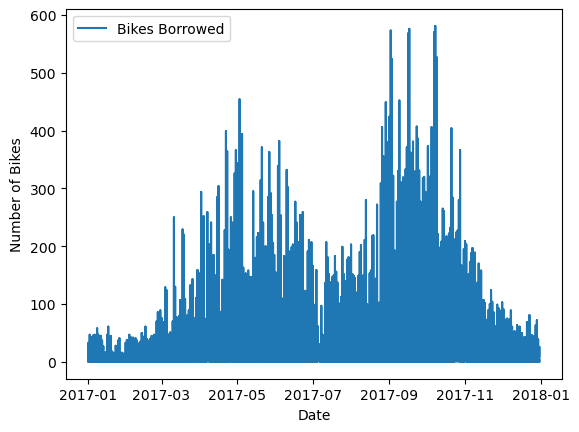

In [65]:
plt.plot(df['Date'], df['Bikes_Borrowed'], label='Bikes Borrowed')
plt.xlabel('Date')
plt.ylabel('Number of Bikes')
plt.legend()
plt.show()

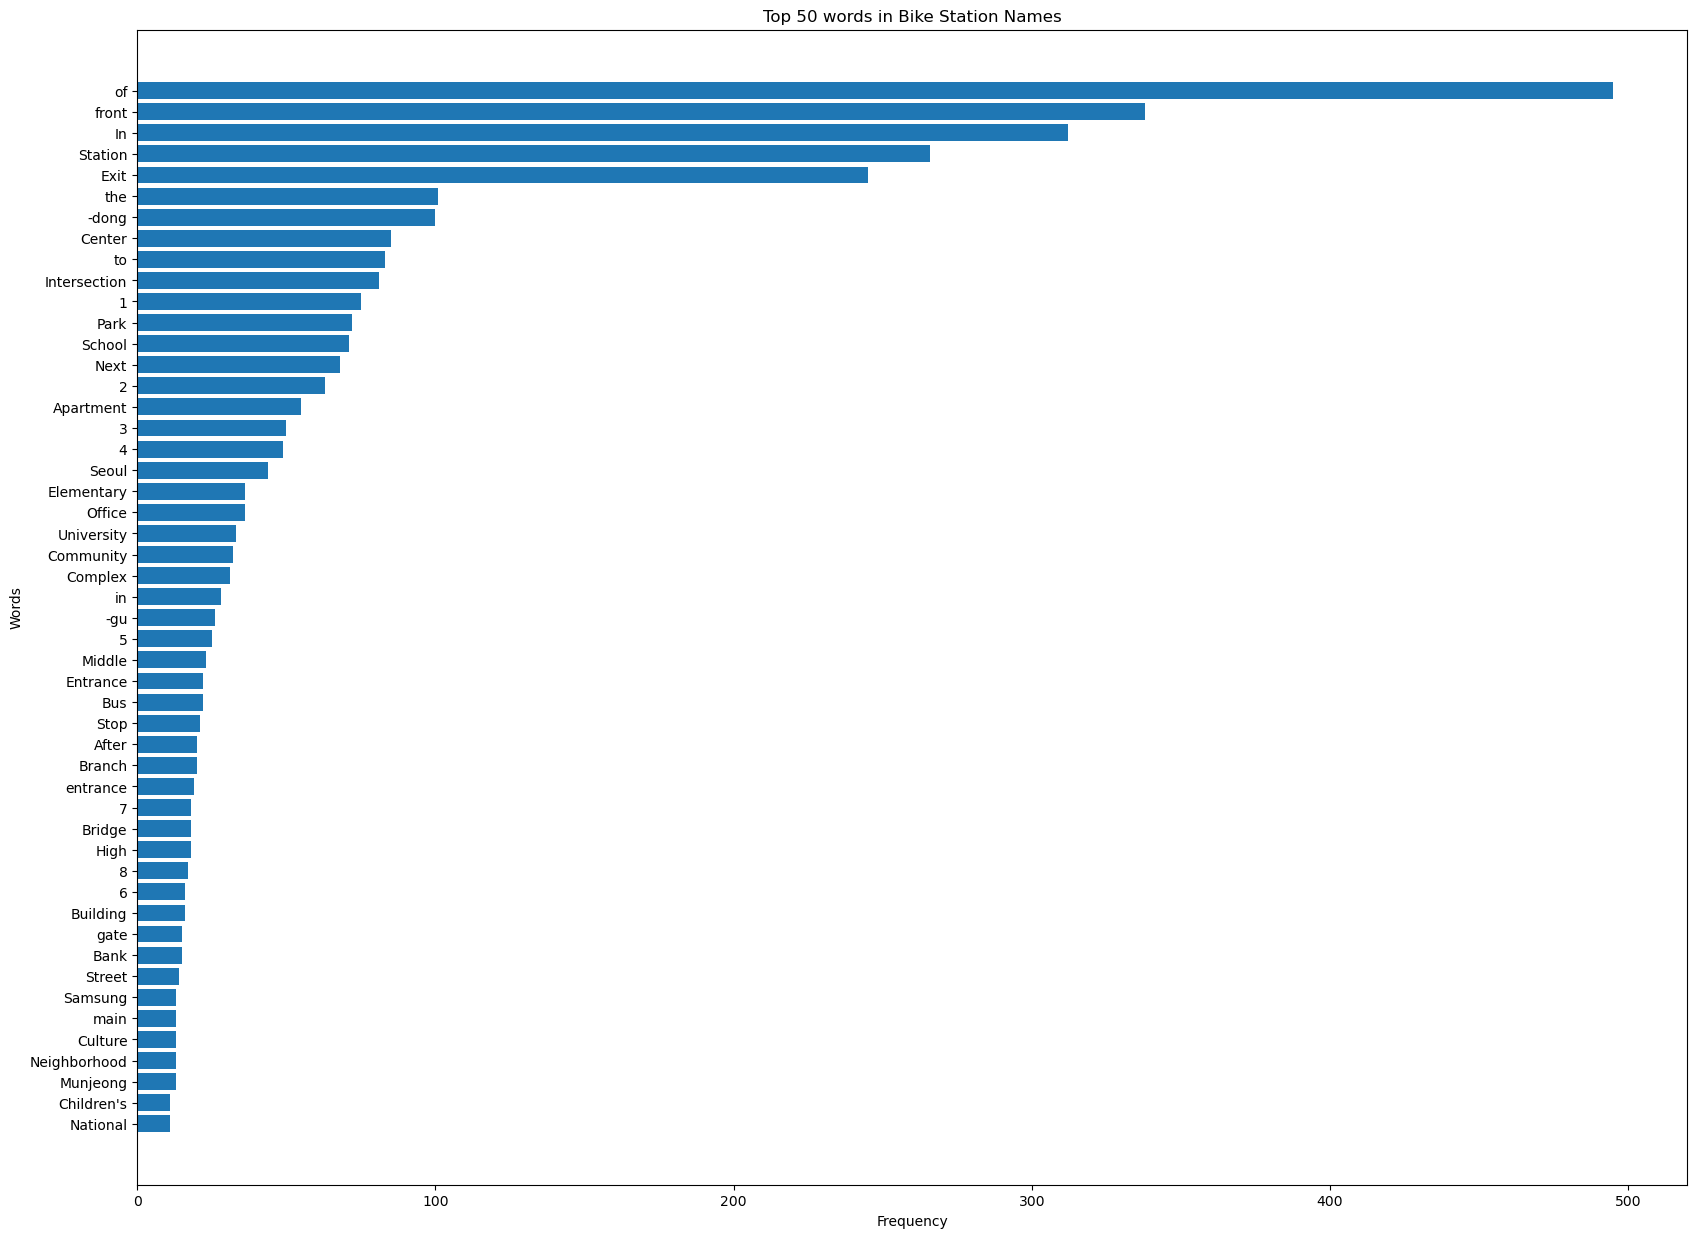

In [103]:
####Investigating the most common words in a bike station's name 
from collections import Counter

unique_names = df['Bike_Station_Name'].unique()
# Join all station names into a single string
text = ' '.join(unique_names)

word_counts = Counter(text.split())
num_words = 50
top_words = word_counts.most_common(num_words)[::-1]
plt.figure(figsize=(20, 15))
plt.barh(range(num_words), [count for word, count in top_words], tick_label=[word for word, count in top_words])
plt.ylabel('Words')
plt.xlabel('Frequency')
plt.title('Top {} words in Bike Station Names'.format(num_words))
plt.show()


In [104]:
#function to find % bikes borrowed from bike stations under a certain text 

### NOTE:Korean will be used for optimal accuracy
def station_name_similar(x, y):
    station_data = df[df['Bike_Station_Name_KR'].str.contains(x)]
    # Calculate the total number of bikes borrowed/returned from the selected stations
    total_bikes_borrowed = station_data[y].sum()
    # Calculate the total number of bikes borrowed/returned from all stations
    all_bikes_borrowed = df[y].sum()
    # Calculate the percentage of total bikes borrowed/returned that come from the selected stations
    percentage = (total_bikes_borrowed / all_bikes_borrowed) * 100
    # Print the result as a percentage with two decimal places
    result_str = "{:.2f}% of total {} come from stations with '{}' in their names.".format(percentage, y.replace('_', ' ').title(), x)
    return print(result_str)


In [114]:
#####Looking at percentage of bike borrowing/returned qty with the name 'Station' in the Bike Station Name & bikes borrowed percentage

station_name_similar('역', 'Bikes_Returned')
station_name_similar('역', 'Bikes_Returned')

#####Looking at percentage with the name 'University' inside
station_name_similar('대학', 'Bikes_Returned')
station_name_similar('대학', 'Bikes_Borrowed')

#####Looking at percentage with the name 'park' inside

station_name_similar('공원', 'Bikes_Returned')
station_name_similar('공원', 'Bikes_Borrowed')

#####Looking at percentage with the name 'School' inside
station_name_similar('학교', 'Bikes_Returned')
station_name_similar('학교', 'Bikes_Borrowed')

#####Looking at percentage with the name 'apartment' inside
station_name_similar('아파트', 'Bikes_Returned')
station_name_similar('아파트', 'Bikes_Borrowed')

#####Looking at percentage with the name '4 way intersection' inside
station_name_similar('사거리', 'Bikes_Returned')
station_name_similar('사거리', 'Bikes_Borrowed')

#####Looking at percentage with the name '3 way intersection' inside
station_name_similar('삼거리', 'Bikes_Returned')
station_name_similar('삼거리', 'Bikes_Borrowed')

#####Looking at percentage with the name 'bus' inside
station_name_similar('버스', 'Bikes_Returned')
station_name_similar('버스', 'Bikes_Borrowed')



36.62% of total Bikes Returned come from stations with '역' in their names.
36.62% of total Bikes Returned come from stations with '역' in their names.
1.09% of total Bikes Returned come from stations with '대학' in their names.
1.07% of total Bikes Borrowed come from stations with '대학' in their names.
5.92% of total Bikes Returned come from stations with '공원' in their names.
5.96% of total Bikes Borrowed come from stations with '공원' in their names.
3.72% of total Bikes Returned come from stations with '학교' in their names.
3.63% of total Bikes Borrowed come from stations with '학교' in their names.
5.07% of total Bikes Returned come from stations with '아파트' in their names.
4.78% of total Bikes Borrowed come from stations with '아파트' in their names.
7.66% of total Bikes Returned come from stations with '사거리' in their names.
7.50% of total Bikes Borrowed come from stations with '사거리' in their names.
1.22% of total Bikes Returned come from stations with '삼거리' in their names.
1.23% of total Bikes

In [60]:
###Looking at percentage of bikes borrowed for each Top 10 stations out of total Top 10 stations

popular = df.groupby('Bike_Station_Name').sum()['Bikes_Borrowed'].sort_values(ascending=False)[:10]
total_bikes_borrowed = popular.sum()

for station, bikes_borrowed in popular.iteritems():
    percentage = (bikes_borrowed / total_bikes_borrowed) * 100
    print(f"{station}: {percentage:.2f}%")


In front of Yeouinaru Station Exit 1: 18.78%
In front of Exit 2 of Hongik University Station: 14.54%
In front of Exit 1: 13.39%
In front of Mapo Sports Center: 8.75%
In front of Hapjeong Station Exit 7: 7.73%
358.: 7.63%
In front of Dangsan Station Exit 10: 7.41%
Gunja Station Exit 7 Best Shop: 7.31%
In front of Home Plus: 7.26%
CJ Dream City: 7.20%


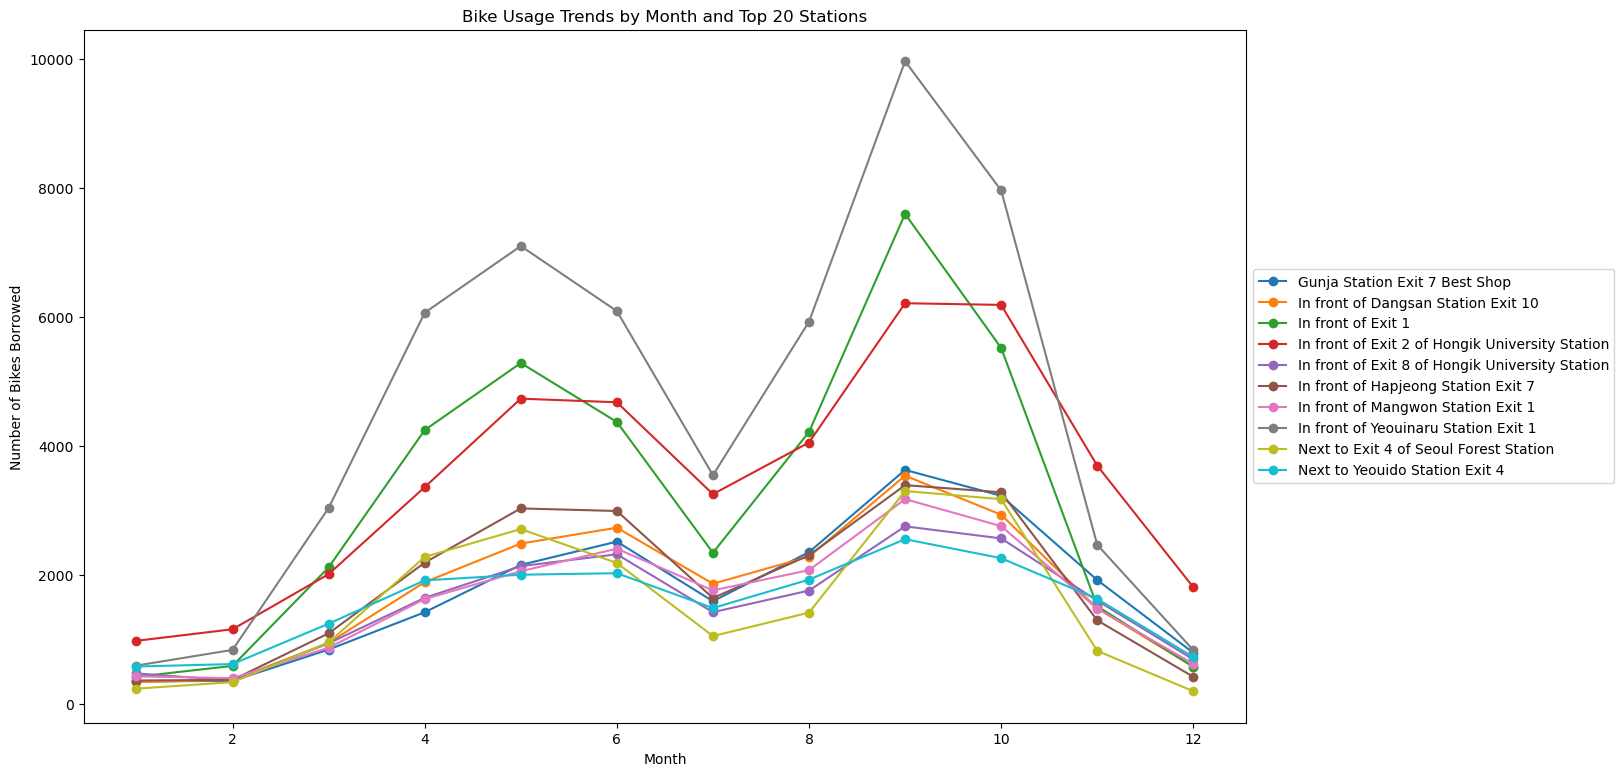

In [122]:
# Plotting month by bike stations containing the word 'train station'
stations = df[df['Bike_Station_Name_KR'].str.contains('역', case=False)]
top_stations = stations.groupby('Bike_Station_Name')['Bikes_Borrowed'].sum().nlargest(10)

top_stations_data = df[df['Bike_Station_Name'].isin(top_stations.index)]
monthly_data = top_stations_data.groupby(['Month', 'Bike_Station_Name'])['Bikes_Borrowed'].sum().unstack()
ax = monthly_data.plot(kind='line', marker='o', figsize=(15, 9))
ax.set_title('Bike Usage Trends by Month and Top 20 Stations')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bikes Borrowed')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [116]:
##Count of Top 10 bike stations containing the word 'train station' by district 

district_counts = df.loc[df['Bike_Station_Name'].isin(top_stations.index)] \
                   .groupby('District')['Bike_Station_Name'].nunique() \
                   .sort_values(ascending=False)

# Display the result as a dataframe
df_district_counts = pd.DataFrame({'District': district_counts.index, 
                                   'Station_Count': district_counts.values})
print(df_district_counts)

           District  Station_Count
0          Mapo -gu              7
1  Yeongdeungpo -gu              5
2      Gwangjin -gu              3
3        Jongno -gu              2
4     Seongdong -gu              2
5     Yangcheon -gu              1


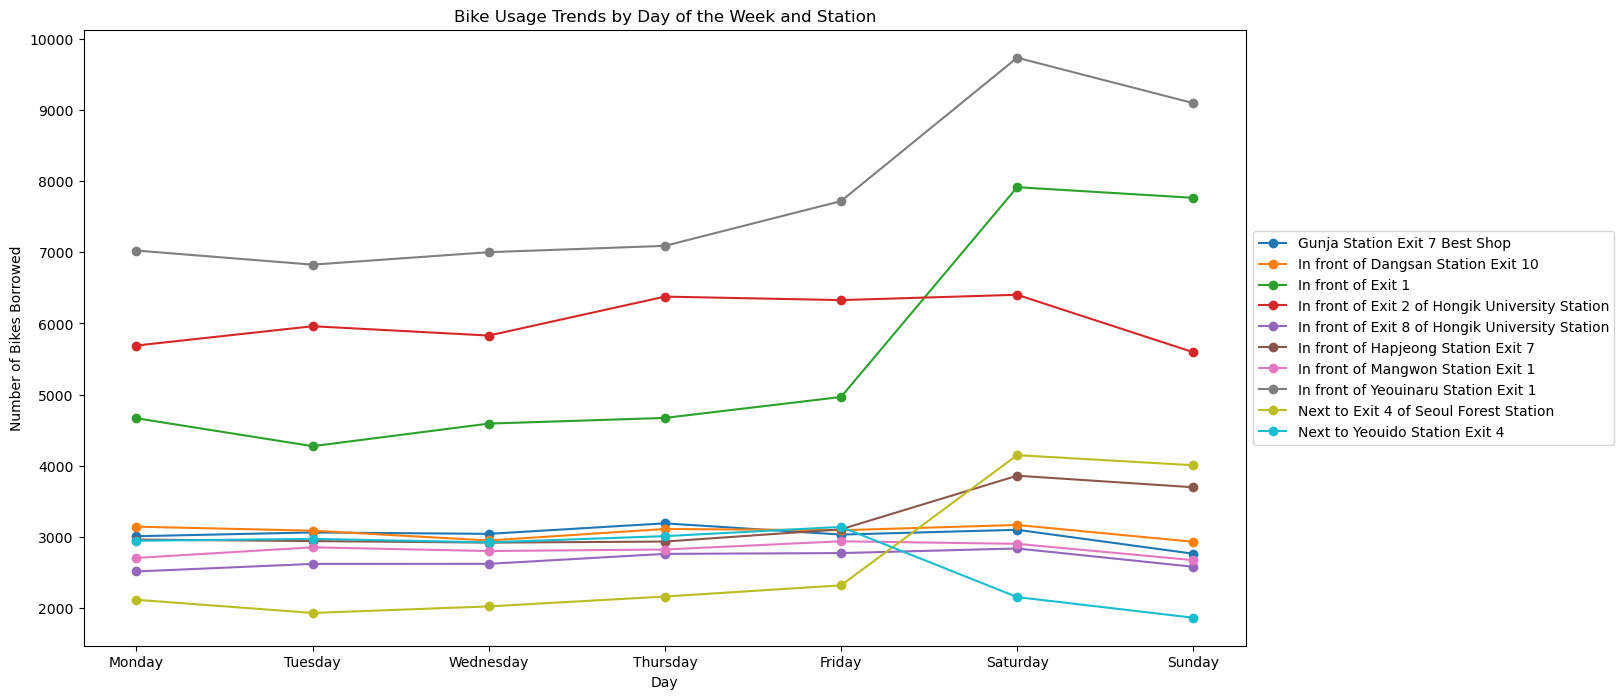

In [125]:
# Plotting day of the week by Top 10 bike stations containing the word 'station'

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day_name'] = pd.Categorical(df['Day_name'], categories=day_order, ordered=True)

stations = df[df['Bike_Station_Name_KR'].str.contains('역')]

top_stations = stations.groupby('Bike_Station_Name')['Bikes_Borrowed'].sum().nlargest(10)
top_stations_data = df[df['Bike_Station_Name'].isin(top_stations.index)]


monthly_data = top_stations_data.groupby(['Day_name', 'Bike_Station_Name'])['Bikes_Borrowed'].sum().unstack()
ax = monthly_data.plot(kind='line', marker='o', figsize=(15, 8))
ax.set_title('Bike Usage Trends by Day of the Week and Station')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Bikes Borrowed')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

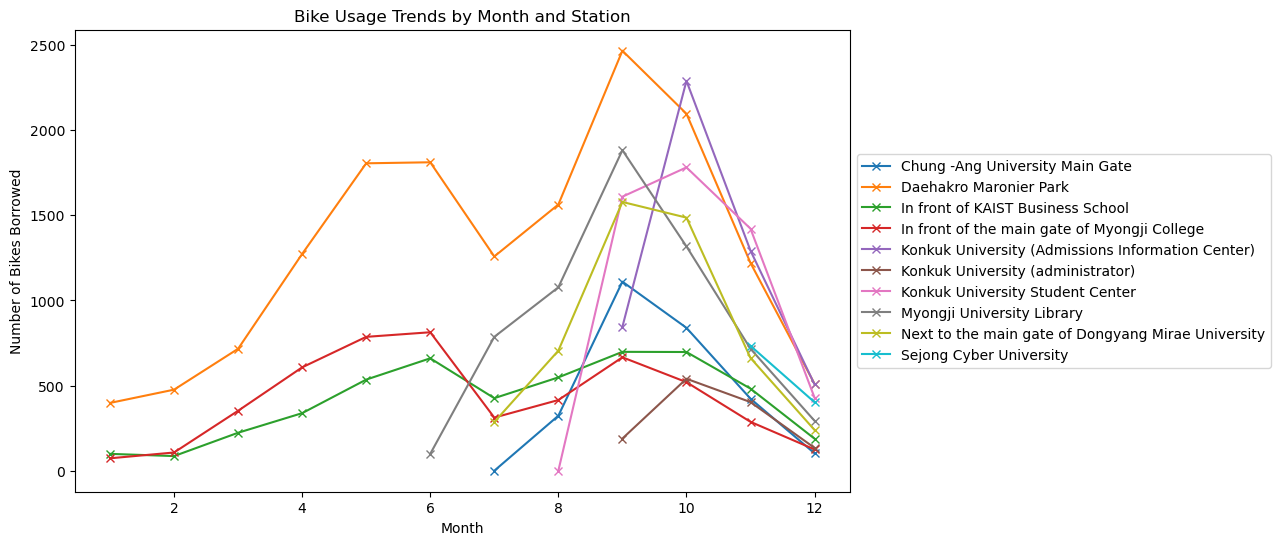

In [131]:
## Month by Top 10 bike stations containing the word 'univerity'


stations = df[df['Bike_Station_Name_KR'].str.contains('대학')]
top_stations = stations.groupby('Bike_Station_Name')['Bikes_Borrowed'].sum().nlargest(10)

# Filter the data to only include the top 20 stations
top_stations_data = df[df['Bike_Station_Name'].isin(top_stations.index)]
monthly_data = top_stations_data.groupby(['Month', 'Bike_Station_Name'])['Bikes_Borrowed'].sum().unstack()
ax = monthly_data.plot(kind='line', marker='x', figsize=(10, 6))
ax.set_title('Bike Usage Trends by Month and Station')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bikes Borrowed')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


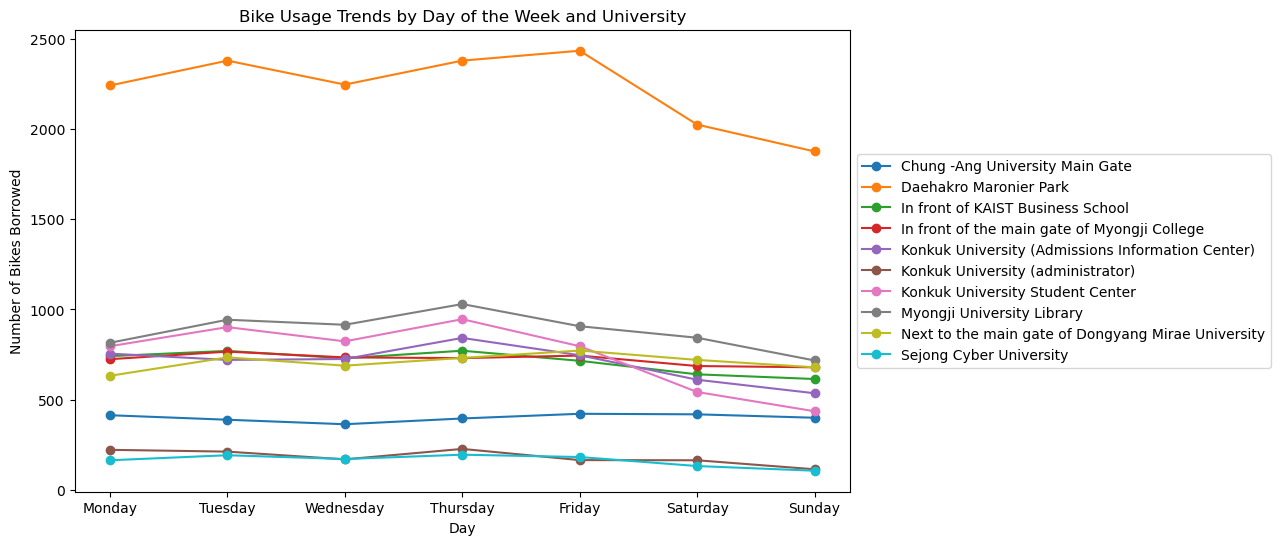

In [132]:
## Day of the week by Top 10 bike stations containing the word 'univerity'
stations = df[df['Bike_Station_Name_KR'].str.contains('대학')]

# Get the top 20 stations with the highest number of bikes borrowed
top_stations = stations.groupby('Bike_Station_Name')['Bikes_Borrowed'].sum().nlargest(10)

# Filter the data to only include the top 20 stations
top_stations_data = df[df['Bike_Station_Name'].isin(top_stations.index)]

# Group the data by month and station name, and calculate the total number of bikes borrowed
monthly_data = top_stations_data.groupby(['Day_name', 'Bike_Station_Name'])['Bikes_Borrowed'].sum().unstack()

# Plot the trends in bike usage over time by month and station
ax = monthly_data.plot(kind='line', marker='o', figsize=(10, 6))
ax.set_title('Bike Usage Trends by Day of the Week and University')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Bikes Borrowed')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [133]:
# Count of top 10 university bike stations for each district
district_counts = df.loc[df['Bike_Station_Name'].isin(top_stations.index)] \
                   .groupby('District')['Bike_Station_Name'].nunique() \
                   .sort_values(ascending=False)

# Display the result as a dataframe
df_district_counts = pd.DataFrame({'District': district_counts.index, 
                                   'Station_Count': district_counts.values})
print(df_district_counts)

         District  Station_Count
0    Gwangjin -gu              4
1   Seodaemun -gu              2
2  Dongdaemun -gu              1
3       Dongjakgu              1
4        Guro -gu              1
5      Jongno -gu              1


In [85]:
###Looking at percentage of bikes borrowed for top 20 stations with the word 'university' inside them

total_bikes_borrowed_uni = top_stations_data['Bikes_Borrowed'].sum()

for station in top_stations.index:
    bikes_borrowed = top_stations_data.loc[top_stations_data['Bike_Station_Name'] == station, 'Bikes_Borrowed'].sum()
    percentage = (bikes_borrowed / total_bikes_borrowed_uni) * 100
    print(f"{station}: {percentage:.2f}%")

Daehakro Maronier Park: 29.06%
Myongji University Library: 11.50%
Konkuk University Student Center: 9.77%
In front of the main gate of Myongji College: 9.44%
In front of KAIST Business School: 9.28%
Next to the main gate of Dongyang Mirae University: 9.24%
Konkuk University (Admissions Information Center): 9.19%
Chung -Ang University Main Gate: 5.21%
Konkuk University (administrator): 2.36%
Sejong Cyber ​​University: 2.12%
In front of Baekseok Art University 3rd Campus: 1.50%
Myongji University Student Center: 1.34%


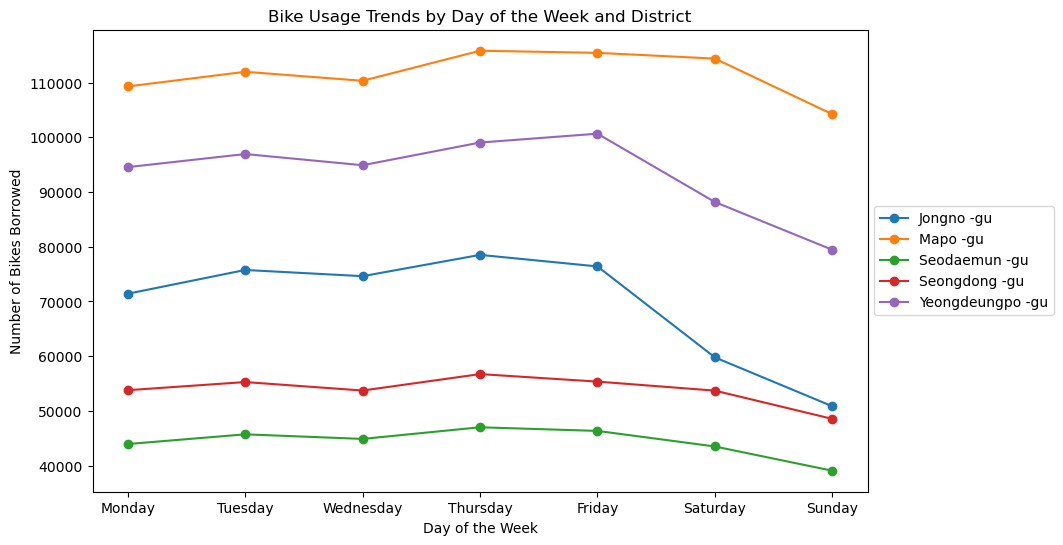

In [139]:

## Bike usage over time by day and district (Top 5)

station_data = df.groupby('District')['Bikes_Borrowed'].sum()

top_stations = station_data.nlargest(5)

stations = df[df['District'].isin(top_stations.index)]

monthly_data = stations.groupby(['Day_name', 'District'])['Bikes_Borrowed'].sum().unstack()

ax = monthly_data.plot(kind='line', marker='o', figsize=(10, 6))
ax.set_title('Bike Usage Trends by Day of the Week and District')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Bikes Borrowed')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


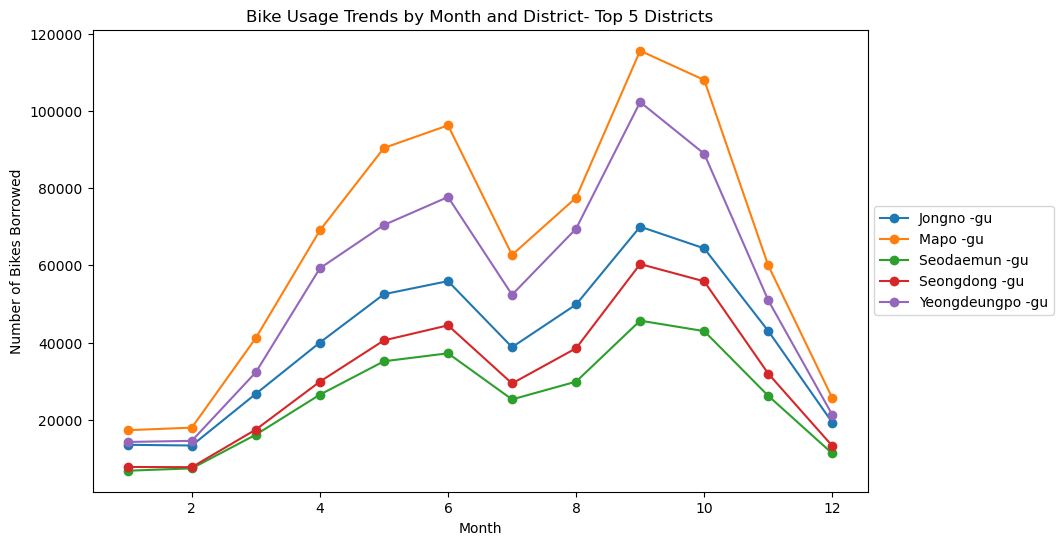

In [140]:
#bike usage over time by month and district-top 5
station_data = df.groupby('District')['Bikes_Borrowed'].sum()

top_stations = station_data.nlargest(5)

stations = df[df['District'].isin(top_stations.index)]
monthly_data = stations.groupby(['Month', 'District'])['Bikes_Borrowed'].sum().unstack()

ax = monthly_data.plot(kind='line', marker='o', figsize=(10, 6))
ax.set_title('Bike Usage Trends by Month and District- Top 5 Districts')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bikes Borrowed')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


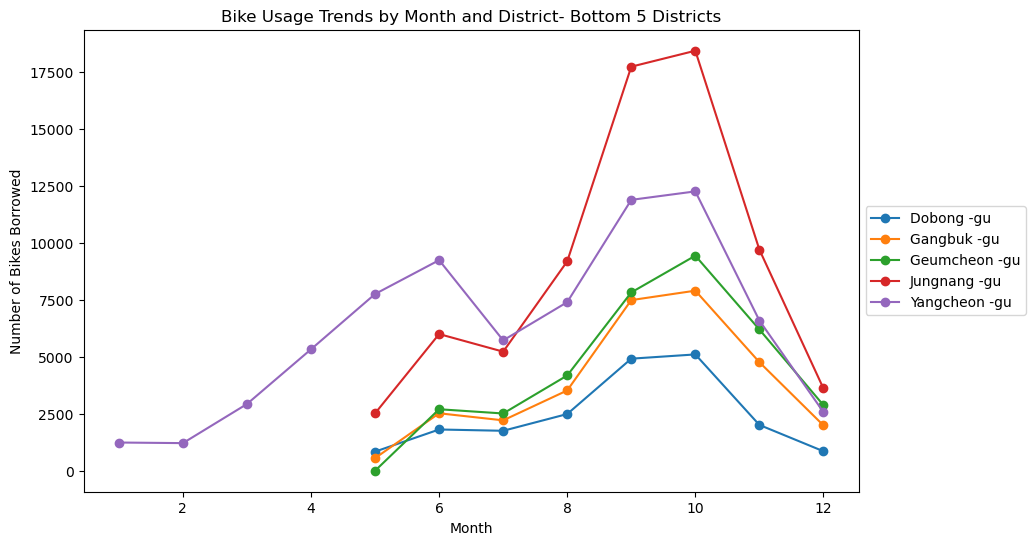

In [83]:
#bike usage over time by month and district-bottom 5
station_data = df.groupby('District')['Bikes_Borrowed'].sum()
top_stations = station_data.nsmallest(5)
stations = df[df['District'].isin(top_stations.index)]
monthly_data = stations.groupby(['Month', 'District'])['Bikes_Borrowed'].sum().unstack()

ax = monthly_data.plot(kind='line', marker='o', figsize=(10, 6))
ax.set_title('Bike Usage Trends by Month and District- Bottom 5 Districts')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bikes Borrowed')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [147]:
#Distribution of bikes borrowed per bikestation per district

district_station_data = df.groupby(['District', 'Bike_Station_Name_KR'])['Bikes_Borrowed'].sum()
top_districts = df.groupby('District')['Bikes_Borrowed'].sum().nlargest(10).index.tolist()
district_station_data = district_station_data.reset_index()
district_station_data = district_station_data[district_station_data['District'].isin(top_districts)]
sorted_districts = df.groupby('District')['Bikes_Borrowed'].sum().nlargest(10).index.tolist()

fig = px.box(district_station_data, x='District', y='Bikes_Borrowed', color='District',
             title='Distribution of Bikes Borrowed per Bike Station in Top 10 Districts',
             points='all', hover_data=['Bike_Station_Name_KR'],
             category_orders={'District': sorted_districts})

fig.show()
## the boxplot shows that mapo-gu yeongdeungpo gu and gwangjin gu have extreme outliers. 